In [9]:
import pandas as pd

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize



nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [10]:
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')


In [11]:
Data


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [12]:
import pandas as pd
import numpy as np
import re
import string
import keras
import nltk


from nltk import sent_tokenize
from nltk import word_tokenize

from keras.models import Sequential
from keras.layers.core import Activation,Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer



from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

nltk.download("popular")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

True

In [13]:
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [14]:
Data.isnull().values.any()

False

In [15]:
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [16]:
Data.groupby(['label']).count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [17]:
Data.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [18]:
Data['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

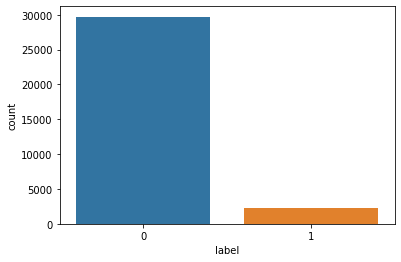

In [19]:
sns.countplot(x='label',data=Data)

In [20]:
del Data['id']

In [21]:
Data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [22]:
def delete_smb(tweet):
  tweet.lower()
  tweet=re.sub(r'\@\w+|\#','',tweet)
  tweet=tweet.translate(str.maketrans('','',string.punctuation))
  tweet=re.sub(r'\s+',' ',tweet)
  tweet=re.sub(r'\s+[a-zA-Z]\s+',' ',tweet)
  tweet=list(tweet.split(" "))
  filtered_words=[w for w in tweet if not w in STOPWORDS]
  alpha_words=[w for w in filtered_words if w.isalpha()]
  return " ".join(alpha_words)

In [23]:
X=[]
sentences=list(Data['tweet'])
for sen in sentences:
  X.append(delete_smb(sen))

In [24]:
print(X[5])

huge fan fare big talking leave chaos pay disputes get allshowandnogo


In [25]:
y=np.array(list(Data['label']))

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=42)

In [28]:
print(len(x_train))
print(len(x_test))
print(np.unique(y))

19177
12785
[0 1]


In [29]:
vocab_size=5000
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)


x_train=tokenizer.texts_to_matrix(x_train,mode = 'binary')
x_test=tokenizer.texts_to_matrix(x_test,mode='binary')

In [30]:
import tensorflow as tf
from keras import utils as np_utils 

y_train =  tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [31]:
print(x_train.shape)

(19177, 5000)


In [32]:
len(tokenizer.word_index)

27206

In [33]:
max_words=5000
model=Sequential()
model.add(Dense(512,input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.metrics_names)

[]


In [35]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 2,561,538
Trainable params: 2,561,538
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
batch_size=32
epochs=10
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)
score=model.evaluate(x_test,y_test,batch_size=batch_size,verbose=1)
print(score[0])
print(score[1])

Epoch 1/10
540/540 [==============================] - 9s 16ms/step - loss: 0.1830 - accuracy: 0.9433 - val_loss: 0.1326 - val_accuracy: 0.9567
Epoch 2/10
540/540 [==============================] - 9s 16ms/step - loss: 0.0896 - accuracy: 0.9682 - val_loss: 0.1312 - val_accuracy: 0.9599
Epoch 3/10
540/540 [==============================] - 8s 16ms/step - loss: 0.0496 - accuracy: 0.9836 - val_loss: 0.1441 - val_accuracy: 0.9578
Epoch 4/10
540/540 [==============================] - 8s 15ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.1629 - val_accuracy: 0.9578
Epoch 5/10
540/540 [==============================] - 8s 16ms/step - loss: 0.0179 - accuracy: 0.9947 - val_loss: 0.1838 - val_accuracy: 0.9552
Epoch 6/10
540/540 [==============================] - 8s 16ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.1929 - val_accuracy: 0.9578
Epoch 7/10
540/540 [==============================] - 8s 15ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.2196 - val_accuracy: 0.9552

In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


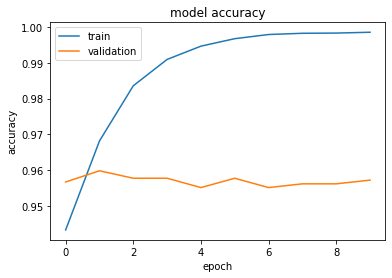

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

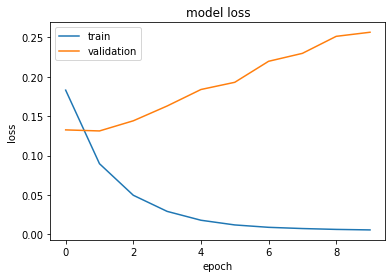

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()